### Tiến hành cài đặt thư viện cần thiết

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8 MB 21 kB/s 
     |████████████████████████████████| 6.6 MB 71.3 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.5.0+cu101 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.5.0+cu101 which is incompatible.
     |████████████████████████████████| 274 kB 8.4 MB/s 
  Created wheel fo

### Cài đặt thư viện detectron2

In [ ]:
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.2 MB 5.8 MB/s 
     |████████████████████████████████| 49 kB 6.3 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20211023-py3-none-any.whl size=60944 sha256=98f91d887104076a2c5550e1898e68e911e1b0110d7b877237bc5bbd44fd1900
  Stored in directory: /root/.cache/pip/wheels/16/98/fc/252d62cab6263c719120e06b28f3378af59b52ce7a20e81852
Successfully built fvcore


### Thêm các thư viện cần thiết

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

### Tải dữ liệu từ google drive và giải nén

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mUdJjmR80LZIZmA8wAfq")
project = rf.workspace().project("yolov5-train")
dataset = project.version(1).download("coco")

     |████████████████████████████████| 145 kB 8.7 MB/s 
     |████████████████████████████████| 178 kB 65.8 MB/s 
     |████████████████████████████████| 1.1 MB 67.1 MB/s 
     |████████████████████████████████| 67 kB 8.0 MB/s 
     |████████████████████████████████| 138 kB 70.1 MB/s 
     |████████████████████████████████| 596 kB 65.8 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
  Created wheel for roboflow: filename=roboflow-0.2.1-py3-none-any.whl size=20916 sha256=3e677fd9fb8b54835eb7e31b560c8edf6ded63e9fc1591c6b825c17330447fc9
  Stored in directory: /root/.cache/pip/wheels/57/00/03/2d83f3e90ff41c36eef9c3747c328290c01b06e2619f9ed7b6
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=5326abdfc70eee7fae1af0f56db465245ffc2b43f47e226eecf692e8973cfafc
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built roboflow wget
  Attempting uninstall: urllib3
    Found existing inst

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to yolov5-train-1 in coco:: 100%|██████████| 3143/3143 [00:07<00:00, 435.81it/s]


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="mUdJjmR80LZIZmA8wAfq")
project = rf.workspace().project("yolov5-test-chg7n")
dataset = project.version(1).download("coco")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to yolov5-test-1 in coco:: 100%|██████████| 691/691 [00:02<00:00, 343.83it/s]


### Thực hiện viện lấy dữ liệu train và valid

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("dataset_train", {}, "/content/yolov5-train-1/train/_annotations.coco.json", "/content/yolov5-train-1/train")
register_coco_instances("dataset_val", {}, "/content/yolov5-test-1/test/_annotations.coco.json", "/content/yolov5-test-1/test")

### Hiển thị data

WARNING [01/15 07:22:41 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/15 07:22:41 d2.data.datasets.coco]: Loaded 3139 images in COCO format from /content/yolov5-train-1/train/_annotations.coco.json


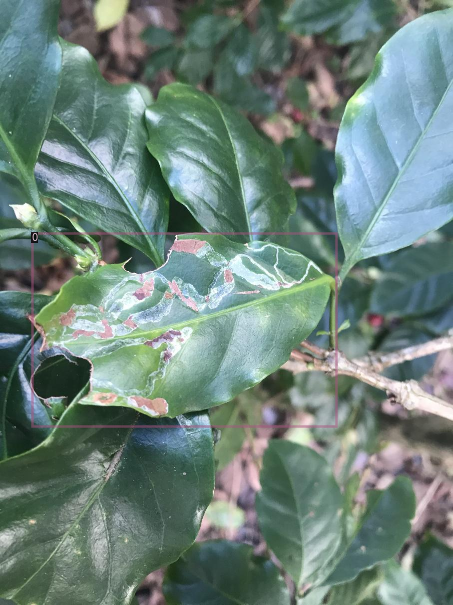

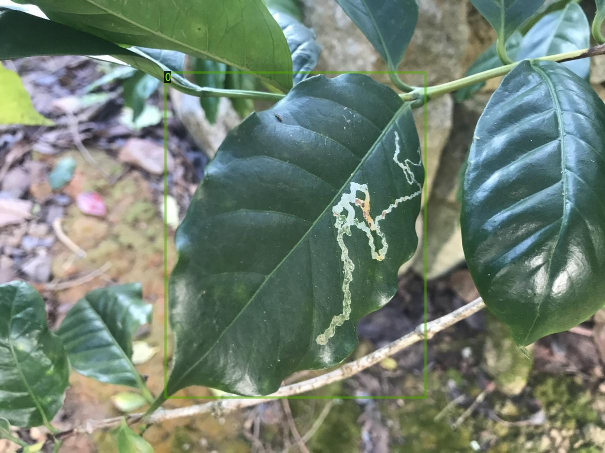

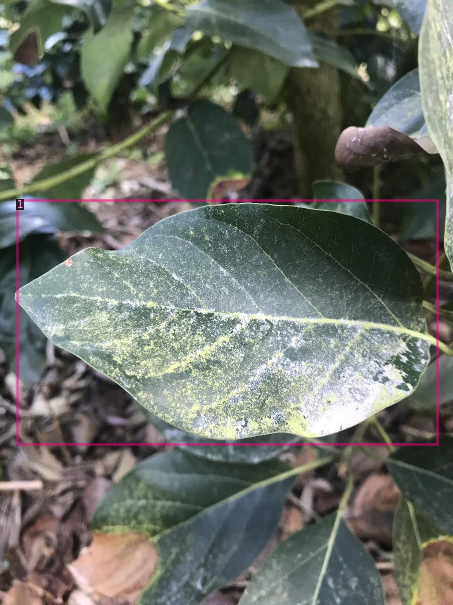

In [ ]:
#Demo thử vài tấm hình trong tập data train
my_dataset_train_metadata = MetadataCatalog.get("dataset_train")
dataset_dicts = DatasetCatalog.get("dataset_train")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

### Huấn luyện mô hình

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
#from .detectron2.tools.train_net import Trainer
#from detectron2.engine import DefaultTrainer
# select from modelzoo here: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md#coco-object-detection-baselines

from detectron2.config import get_cfg
#from detectron2.evaluation.coco_evaluation import COCOEvaluator
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("dataset_train",)
cfg.DATASETS.TEST = ("dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001 #learning rate

cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 15000 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (6000, 10000)
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.DEVICE = 'cuda'
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5 #your number of classes + 1

cfg.TEST.EVAL_PERIOD = 500

cfg.OUTPUT_DIR = "/content/drive/MyDrive"
cfg.SOLVER.CHECKPOINT_PERIOD = 500
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[01/15 08:42:24 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

KeyboardInterrupt: ignored

In [ ]:

import detectron2
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
import os
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.25
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("dataset_val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "dataset_val")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [01/15 13:36:24 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/15 13:36:24 d2.data.datasets.coco]: Loaded 687 images in COCO format from /content/yolov5-test-1/test/_annotations.coco.json
[01/15 13:36:24 d2.data.common]: Serializing 687 elements to byte tensors and concatenating them all ...
[01/15 13:36:24 d2.data.common]: Serialized dataset takes 0.18 MiB
[01/15 13:36:24 d2.evaluation.evaluator]: Start inference on 687 images
[01/15 13:36:28 d2.evaluation.evaluator]: Inference done 11/687. 0.2418 s / img. ETA=0:02:44
[01/15 13:36:33 d2.evaluation.evaluator]: Inference done 32/687. 0.2417 s / img. ETA=0:02:39
[01/15 13:36:38 d2.evaluation.evaluator]: Inference done 53/687. 0.2426 s / img. ETA=0:02:34
[01/15 13:36:43 d2.evaluation.evaluator]: Inference done 74/687. 0.2435 s / img. ETA=0:02:30
[01/15 13:36:48 d2.evaluation.evaluator]: Inference done 95/687. 0.2441 s / img. ETA=0:02:25
[01/15 13:36:53 d2.evalu

OrderedDict([('bbox',
              {'AP': 93.34097807161486,
               'AP-0': 91.19708893758249,
               'AP-1': 95.52599404134912,
               'AP-2': 94.25122758629999,
               'AP-3': 92.3896017212278,
               'AP-uit': nan,
               'AP50': 99.38579298073498,
               'AP75': 99.38579298073498,
               'APl': 93.34097807161486,
               'APm': nan,
               'APs': nan})])